SAI KRISHNA AMANCHI           256ska@gmail.com         dataset = https://drive.google.com/drive/folders/1Qt1HfSoTyCKiyDy2frR-hYOT9UvfwGq7

Loading Data:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Online_Sales = pd.read_csv("https://drive.google.com/uc?id=1ZvQn7-UtGSdJa3H9zM4ve_uzACFAzF0Z")
Online_Sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [81]:
Customers = pd.read_csv("https://docs.google.com/spreadsheets/d/1rqihT647UW9HEmERxCrTJrcZZ9xE5TEi/export?format=csv")
Customers.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [82]:
Discount_Coupon = pd.read_csv("https://drive.google.com/uc?id=1CfORUKckP7Qi9swmCe8XEgLLWnpKl4eE")
Discount_Coupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [83]:
Marketing_Spend = Marketing_Spend = pd.read_csv("https://drive.google.com/uc?id=1hjHgCluvPEUfrp9w-_-73ch0d9SK6FHf")
Marketing_Spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [84]:
Tax_amount = pd.read_csv("https://docs.google.com/spreadsheets/d/1tqJmtKcfhiEJXYVV21ybnD4UaXYW9r4v/export?format=csv")
Tax_amount.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


Data Merging:

In [85]:
df = Online_Sales.merge(Customers, on='CustomerID', how='left').merge(Discount_Coupon, on='Product_Category', how='left').merge(Tax_amount, on='Product_Category', how='left')
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0,10%
1,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,ELEC20,20.0,10%
2,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,ELEC30,30.0,10%
3,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,ELEC10,10.0,10%
4,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,ELEC20,20.0,10%


Inspecting data : Below null discount values are replaced by 0

In [86]:
for col in df:
  if df[col].isna().sum()>0:
    print(col,df[col].isna().sum())

Month 400
Coupon_Code 400
Discount_pct 400


In [87]:
df['Discount_pct'] = df['Discount_pct'].fillna(0)
df['Discount_pct'].isna().sum()

np.int64(0)

Calculating Invoice value:

In [88]:
df['GST'] = df['GST'].astype(str).str.replace('%', '').astype(float)
df['invoice_value'] = ((df['Avg_Price'] * df['Quantity']) * np.where(df['Coupon_Status'] == 'Used', 1 - df['Discount_pct']/100, 1) * (1 + df['GST']/100)) + df['Delivery_Charges']
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,GST,invoice_value
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0,10.0,158.6729
1,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,ELEC20,20.0,10.0,141.7648
2,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,ELEC30,30.0,10.0,124.8567
3,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,ELEC10,10.0,10.0,158.6729
4,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,ELEC20,20.0,10.0,141.7648


Date Handling:

In [89]:
df['Transaction_Date'] = pd.to_datetime(
    df['Transaction_Date'],
    format='%m/%d/%Y'
)


In [90]:
df['month'] = df['Transaction_Date'].dt.month
df['month_name'] = df['Transaction_Date'].dt.month_name()

In [91]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,GST,invoice_value,month,month_name
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0,10.0,158.6729,1,January
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,ELEC20,20.0,10.0,141.7648,1,January
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,ELEC30,30.0,10.0,124.8567,1,January
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,ELEC10,10.0,10.0,158.6729,1,January
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,ELEC20,20.0,10.0,141.7648,1,January


1. Identify the months with the highest and lowest customer acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?

Ans. January has the highest customer acquisition count(215). November has the lowest customer acquisition count(68).
Strategies that could be implemented to address the fluctuations and ensure consistent growth throughout the year:
a.Keep Sale season every month.
b.Offer Prime Membership.

In [92]:
cus_first_tr = df.groupby('CustomerID',as_index=False)['month'].min()
monthly_cus_acq = cus_first_tr.groupby('month',as_index=False).agg(acquistion_count=('CustomerID','count')).sort_values('acquistion_count',ascending=False)
monthly_cus_acq

,month,acquistion_count
0,1,215
2,3,177
3,4,163
5,6,137
7,8,135
4,5,112
11,12,106
1,2,96
6,7,94
9,10,87


2. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.

Ans. July and June are high retention months in descending order based on below code results. My plan is to Split data into high-retention months and other months. Compare behavior across both groups and identify features that are significantly higher/lower only in top months.

In [93]:
cust_month = df[['CustomerID','month']].drop_duplicates()
cust_month = cust_month.sort_values(['CustomerID','month']).reset_index(drop=True)
cust_month['next_seen_month'] = cust_month.groupby('CustomerID',as_index=False)['month'].shift(-1)
cust_month['is_retained'] = (cust_month['next_seen_month'] == 1+cust_month['month'])
retention = cust_month.groupby('month',as_index=False).agg(total_customers=('CustomerID','count'),retained_customers=('is_retained','sum'))
retention['retention_rate'] = retention['retained_customers']/retention['total_customers']
retention = retention.sort_values('retention_rate',ascending=False).reset_index(drop=True)
retention

,month,total_customers,retained_customers,retention_rate
0,7,236,65,0.275424
1,6,259,58,0.223938
2,5,200,37,0.185000
3,9,193,29,0.150259
4,11,188,28,0.148936
5,10,210,31,0.147619
6,8,300,44,0.146667
7,3,208,24,0.115385
8,4,224,25,0.111607
9,2,109,11,0.100917


In [94]:
top_months = retention['month'].head(2)
df['is_top_retention_month'] = df['month'].isin(top_months)

Product Category based Comparison : From below, 'Android' and 'Fun' product categories are very strong retention drivers compared to other product categories.

In [95]:
cat_dist = df.groupby(['Product_Category','is_top_retention_month']).size().reset_index(name='count')
cat_dist['pct'] = cat_dist.groupby(['Product_Category'])['count'].transform(lambda x: (100*x) / x.sum())
cat_dist[cat_dist['is_top_retention_month']==True].sort_values('pct',ascending=False)

,Product_Category,is_top_retention_month,count,pct
3,Android,True,204,39.534884
15,Fun,True,52,32.500000
33,Notebooks & Journals,True,2436,27.102804
23,Housewares,True,384,26.229508
19,Google,True,25,23.809524
21,Headgear,True,2196,23.735409
11,Bottles,True,744,23.134328
29,Nest-Canada,True,816,21.451104
25,Lifestyle,True,7836,21.119017
5,Apparel,True,45936,21.118835


Discount % based Comparison : From below, the data indicates that non-discounted transactions result in higher customer retention rates compared to discounted ones. Discount-driven acquisitions appear to have a lower retention rate compared to organic, non-discounted purchases.

In [96]:
disc_dist = df.groupby(['Discount_pct','is_top_retention_month']).size().reset_index(name='count')
disc_dist['pct'] = disc_dist.groupby(['Discount_pct'])['count'].transform(lambda x: (100*x) / x.sum())
disc_dist[disc_dist['is_top_retention_month']==True].sort_values('pct',ascending=False)

,Discount_pct,is_top_retention_month,count,pct
1,0.0,True,89,22.250000
3,10.0,True,37420,17.810905
5,20.0,True,37420,17.810905
7,30.0,True,37420,17.810905


Invoice value based Comparison : Below analysis indicates that lower-value transactions demonstrate superior retention performance compared to high-value purchases.

In [97]:
invoice_dist = df.groupby('is_top_retention_month',as_index=False)['invoice_value'].mean()
invoice_dist

,is_top_retention_month,invoice_value
0,False,105.534706
1,True,85.997128


Average Price based Comparison : Data indicates that lower-price per quantity transactions drive superior retention performance compared to higher price per quantity purchases.

In [98]:
avg_price_dist = df.groupby('is_top_retention_month',as_index=False)['Avg_Price'].mean()
avg_price_dist

,is_top_retention_month,Avg_Price
0,False,54.892059
1,True,40.975626


3. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

Ans. From below graph, we can see that,
From January to June, revenue is predominantly driven by new customer acquisition, though its contribution steadily declines over time. From July through September, existing customers become the primary revenue drivers, indicating stronger customer loyalty. In October, revenue shows a renewed spike by new customer acquisition. Finally, in November and December, revenue is once again largely driven by existing customers, reflecting sustained loyalty toward the end of the year.

In [99]:
cus_first_tr = cus_first_tr.rename(columns={'month': 'first_month'})
df = df.merge(cus_first_tr, on='CustomerID', how='left')


In [100]:
df['is_first_month'] = (df['first_month'] == df['month'])
comp_revenue = df.groupby(['month','is_first_month'],as_index=False)['invoice_value'].sum()
comp_pivot = comp_revenue.pivot_table(values='invoice_value',index='month',columns='is_first_month',aggfunc='sum')
comp_pivot = comp_pivot.rename(columns={True: 'new_customers', False: 'existing_customers'})
comp_pivot = comp_pivot.reset_index()
comp_pivot.columns.name = None
comp_pivot

,month,existing_customers,new_customers
0,1,NaN,5.714240e+06
1,2,5.569393e+05,3.905780e+06
2,3,8.209456e+05,4.248443e+06
3,4,2.256151e+06,3.226825e+06
4,5,1.567790e+06,2.765260e+06
5,6,1.781853e+06,2.664405e+06
6,7,3.140284e+06,2.075150e+06
7,8,2.947531e+06,2.734956e+06
8,9,2.908606e+06,2.014886e+06
9,10,2.590748e+06,2.979255e+06


In [101]:
comp_pivot['existing_customers'] = comp_pivot['existing_customers'].fillna(0)

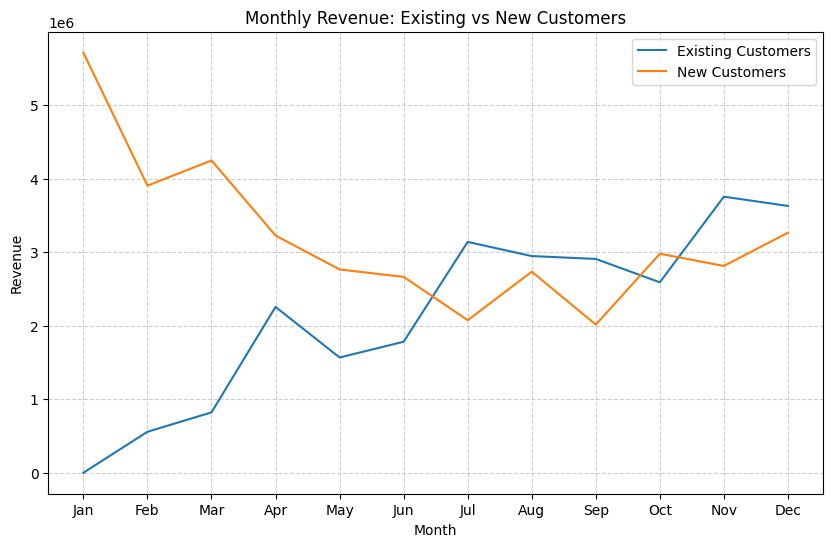

In [102]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=comp_pivot, x='month', y='existing_customers', label='Existing Customers')
sns.lineplot(data=comp_pivot, x='month', y='new_customers', label='New Customers')

# 🔹 month numbers and names
months = range(1, 13)
month_names = [calendar.month_abbr[m] for m in months]   # Jan, Feb, ...

plt.xticks(months, month_names)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue: Existing vs New Customers')
plt.legend()

plt.show()

4. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

Ans. ("Nest Cam Outdoor Security Camera - USA", "GGOENEBQ078999"), ("Nest Learning Thermostat 3rd Gen - USA - Stainless", "GGOENEBJ079499"), ("Nest Cam Indoor Security Camera - USA", "GGOENEBB078899"), ("Sport Bag", "GGOEGBMJ013399"), ("Google Metallic Notebook Set", "GGOEGOLC014299"), ("Google 22 oz Water Bottle", "GGOEGDHC018299"), ("Nest Protect Smoke + CO White Battery Alarm - USA", "GGOENEBQ079099"), ("Maze Pen", "GGOEGGOA017399"), ("Google Laptop and Cell Phone Stickers", "GGOEGFKQ020399"), ("Nest Protect Smoke + CO White Wired Alarm - USA", "GGOENEBQ079199") are top-performing products.

They are mostly from categories : Nest-USA and Office.

This analysis can directly guide inventory teams to maintain higher availability for top-performing products.

Promote and highlight above products more to attract customers by showcasing in demand products.

Bundle low-performing products with high-selling items to lift demand and improve overall catalog performance. Low-performing products are given at the last output within this question.

In [103]:
prod_analysis = df.groupby('Product_SKU',as_index=False).agg(total_revenue=('invoice_value','sum'),total_quantity=('Quantity','sum'),
                                                             Product_Category=('Product_Category','first'),Product_Description=('Product_Description','first'))

prod_analysis['revenue_rank'] = prod_analysis['total_revenue'].rank(ascending=False)
prod_analysis['quantity_rank'] = prod_analysis['total_quantity'].rank(ascending=False)

prod_analysis['performance_score'] = (
    prod_analysis['revenue_rank'] + prod_analysis['quantity_rank']
)

top_products = (
    prod_analysis
    .sort_values('performance_score')
    .head(10)
)

top_products

,Product_SKU,total_revenue,total_quantity,Product_Category,Product_Description,revenue_rank,quantity_rank,performance_score
983,GGOENEBQ078999,8.055150e+06,62472,Nest-USA,Nest Cam Outdoor Security Camera - USA,2.0,7.0,9.0
981,GGOENEBJ079499,8.780868e+06,54840,Nest-USA,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,10.0,11.0
976,GGOENEBB078899,6.815237e+06,52824,Nest-USA,Nest Cam Indoor Security Camera - USA,3.0,12.0,15.0
854,GGOEGBMJ013399,5.038515e+05,87852,Bags,Sport Bag,13.0,3.0,16.0
969,GGOEGOLC014299,5.000125e+05,77952,Office,Google Metallic Notebook Set,14.0,4.0,18.0
880,GGOEGDHC018299,4.451346e+05,116736,Drinkware,Google 22 oz Water Bottle,17.0,2.0,19.0
984,GGOENEBQ079099,2.739012e+06,32196,Nest-USA,Nest Protect Smoke + CO White Battery Alarm-USA,4.0,23.0,27.0
914,GGOEGGOA017399,2.379133e+05,194808,Office,Maze Pen,26.0,1.0,27.0
904,GGOEGFKQ020399,2.964157e+05,70164,Office,Google Laptop and Cell Phone Stickers,23.0,5.0,28.0
985,GGOENEBQ079199,2.696424e+06,32040,Nest-USA,Nest Protect Smoke + CO White Wired Alarm-USA,5.0,24.0,29.0


In [104]:
top_products['Product_Category'].value_counts()

,count
Product_Category,
Nest-USA,5
Office,3
Bags,1
Drinkware,1


In [105]:
prod_analysis['revenue_bucket'] = pd.qcut(
    prod_analysis['total_revenue'], 4, labels=['Low','Mid','High','Very High']
)

prod_analysis['quantity_bucket'] = pd.qcut(
    prod_analysis['total_quantity'], 4, labels=['Low','Mid','High','Very High']
)

low_performers = prod_analysis[
    (prod_analysis['revenue_rank'] > 0.95*len(prod_analysis)) &
    (prod_analysis['quantity_rank'] > 0.95*len(prod_analysis))
]

low_performers

,Product_SKU,total_revenue,total_quantity,Product_Category,Product_Description,revenue_rank,quantity_rank,performance_score,revenue_bucket,quantity_bucket
41,GGOEAAAJ034513,346.89840,12,Apparel,Android Men's Vintage Tee,1116.0,1115.5,2231.5,Low,Low
64,GGOEAAEB030213,304.41840,12,Apparel,Android Women's Racer Back Tank Black,1125.0,1115.5,2240.5,Low,Low
82,GGOEAAEC029416,404.09040,12,Apparel,Android Women's Short Sleeve Tri-blend Badge T...,1106.0,1115.5,2221.5,Low,Low
88,GGOEAAEJ029313,393.71232,12,Apparel,Android Women's Short Sleeve Badge Tee Light C...,1108.0,1115.5,2223.5,Low,Low
89,GGOEAAEJ029314,293.11872,12,Apparel,Android Women's Short Sleeve Badge Tee Light C...,1127.0,1115.5,2242.5,Low,Low
91,GGOEAAEJ029317,346.89840,12,Apparel,Android Women's Short Sleeve Badge Tee Light C...,1116.0,1115.5,2231.5,Low,Low
106,GGOEAAEQ091612,389.32560,12,Apparel,Android Matrix Tee White,1109.0,1115.5,2224.5,Low,Low
112,GGOEAAEQ091618,325.86048,12,Apparel,Android Matrix Tee White,1119.5,1115.5,2235.0,Low,Low
132,GGOEAAWC062448,311.93856,12,Apparel,Android Infant Short Sleeve Tee Aqua,1122.0,1115.5,2237.5,Low,Low
256,GGOEGAAJ057018,258.91200,12,Apparel,Google Men's Short Sleeve Performance Badge Te...,1136.0,1115.5,2251.5,Low,Low


5. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

Ans. From below, I segmented 1468 customers into:
Premium	87 customers
Gold	507 customers
Silver	660 customers
Standard	214 customers


**Premium Customers:**

(High Recency, High Frequency, High Monetary)

Goal: Retain & maximize lifetime value

Strategies:

Exclusive early access to new products

VIP-only discounts (light, not heavy)

Loyalty rewards and premium support

Personalized recommendations

Why it works:
These customers already love the product — the goal is recognition, not discounts.


**Gold Customers:**

(Strong value, slightly lower than Premium)

Goal: Upgrade to Premium

Strategies:

Tier-based loyalty programs

Personalized bundle offers

Threshold-based rewards (e.g., “Spend ₹X to unlock VIP perks”)

Limited-time offers to increase purchase frequency

Why it works:
They’re highly engaged and one nudge away from Premium.


**Silver Customers:**

(Moderate activity and spend)

Goal: Increase frequency & engagement

Strategies:

Targeted coupons and seasonal discounts

Cross-sell / upsell recommendations

Reminder campaigns (email / push)

Free delivery thresholds

Why it works:
Silver customers respond well to price incentives and convenience.


**Standard Customers:**

(Low Recency, Frequency, and Monetary)

Goal: Prevent churn or re-activate selectively

Strategies:

Win-back campaigns (time-bound discounts)

Entry-level product promotions

Personalized reminders based on past behavior

Limit marketing spend (ROI-sensitive group)

Why it works:
These customers have low loyalty — investment should be measured and efficient.

In [106]:
today = pd.to_datetime('2020-01-01')
rfm = df.groupby('CustomerID',as_index=False).agg({
    'Transaction_Date': lambda x: (today - x.max()).days,   # Recency
    'Transaction_ID': 'count',                              # Frequency
    'invoice_value': 'sum'                                  # Monetary
})
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,108,24,2142.60672
1,12347,60,709,190207.58888
2,12348,74,276,20125.21872
3,12350,18,204,18284.33904
4,12356,108,432,24986.31120
...,...,...,...,...
1463,18259,271,73,9869.96340
1464,18260,88,469,35827.50384
1465,18269,195,96,1952.74320
1466,18277,70,12,4005.60000


In [107]:
rfm['Frequency'].max()

8197

In [108]:
rfm['Monetary'].max()

1025687.43976

In [109]:
r_bins = [0, 100, 200, 300, np.inf]
f_bins = [0, 40, 70, 100, np.inf]
m_bins = [0, 4000, 7000, 10000, np.inf]

# Assign segment scores using pd.cut
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=r_bins, labels=False) + 1
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=f_bins, labels=False) + 1
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=m_bins, labels=False) + 1

rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

def classify_customer(score):
    if score <= 6:
        return 'Standard'
    elif score <= 9:
        return 'Silver'
    elif score <= 11:
        return 'Gold'
    else:
        return 'Premium'

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(classify_customer)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
0,12346,108,24,2142.60672,2,1,1,4,Standard
1,12347,60,709,190207.58888,1,4,4,9,Silver
2,12348,74,276,20125.21872,1,4,4,9,Silver
3,12350,18,204,18284.33904,1,4,4,9,Silver
4,12356,108,432,24986.31120,2,4,4,10,Gold
...,...,...,...,...,...,...,...,...,...
1463,18259,271,73,9869.96340,3,3,3,9,Silver
1464,18260,88,469,35827.50384,1,4,4,9,Silver
1465,18269,195,96,1952.74320,2,3,1,6,Standard
1466,18277,70,12,4005.60000,1,1,2,4,Standard


In [110]:
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Silver,660
Gold,507
Standard,214
Premium,87


6. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

Ans. Revenue analysis shows that Silver customers contribute the majority of revenue (57.48%), followed by Gold customers (34.58%), while Premium customers account for a smaller share (7.13%) and Standard customers contribute minimally (0.82%). This indicates a volume-driven business where mid-tier customers are the primary revenue engine. As a result, the company should prioritize retention and engagement strategies for Silver customers to sustain the revenue base, focus on upgrading Gold customers into Premium through loyalty and value-based incentives, and retain Premium customers via personalized, high-touch experiences to maximize lifetime value. For Standard customers, marketing efforts should remain selective and cost-efficient, aimed at reactivation only when ROI is justified.

In [111]:
segment_revenue = (
    rfm.groupby('Customer_Segment', as_index=False)
       .agg(
           total_customers=('CustomerID', 'count'),
           total_revenue=('Monetary', 'sum'),
           avg_revenue_per_customer=('Monetary', 'mean')
       )
)

segment_revenue['revenue_share_%'] = (
    segment_revenue['total_revenue'] /
    segment_revenue['total_revenue'].sum() * 100
)

segment_revenue.sort_values('total_revenue', ascending=False)


,Customer_Segment,total_customers,total_revenue,avg_revenue_per_customer,revenue_share_%
2,Silver,660,3.699456e+07,56052.357661,57.476695
0,Gold,507,2.225637e+07,43898.164609,34.578671
1,Premium,87,4.588930e+06,52746.319261,7.129604
3,Standard,214,5.245899e+05,2451.354585,0.815031


7. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

Ans. June and July has the highest retention rates of 0.146 and 0.138 respectively. January and October has the lowest retention rates of 0.060 and 0.069.

Following strategies can be implemented to improve retention of weak cohorts:

**Post-purchase engagement:**
Send follow-up emails or notifications with product usage tips and personalized recommendations immediately after the first purchase.

**Early second-purchase incentives:**
Offer time-bound benefits (e.g., free delivery, small discount, bonus points) valid within 30 days to encourage a quick repeat purchase.

**Shift from one-time discounts to loyalty rewards:**
Replace heavy acquisition discounts with loyalty points, credits, or tier-progression incentives to promote continued engagement.

**Cross-sell and bundling:**
Recommend complementary or replenishable products and bundle them with the initial purchase category to create a natural reason to return.

**Reorder and reminder nudges:**
Use behavior-based reminders (replenishment alerts, category-specific nudges) to prompt timely repeat purchases.

**Seasonal cohort re-engagement:**
For festival or deal-driven cohorts, run post-season campaigns to extend engagement beyond the initial buying window.

**Reduce friction in repeat purchases:**
Simplify checkout, highlight saved preferences, and offer free-delivery thresholds to make returning easier.

**Targeted communication:**
Personalize messaging based on cohort behavior rather than generic campaigns to improve relevance and response rates.

In [112]:
# Months since first purchase
df['cohort_index'] = df['month'] - df['first_month']
cohort_data = (
    df.groupby(['first_month', 'cohort_index'])['CustomerID']
      .nunique()
      .reset_index()
)
cohort_pivot = cohort_data.pivot(
    index='first_month',
    columns='cohort_index',
    values='CustomerID'
)

cohort_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
1,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
3,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
4,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
5,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
6,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
7,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
8,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Convert counts → retention rate
cohort_retention = cohort_pivot.div(cohort_pivot[0], axis=0)
cohort_retention


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
1,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
3,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
4,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
5,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
6,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
7,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
month1_retention = cohort_retention[1].dropna()
month1_retention.sort_values()

,1
first_month,
1,0.060465
10,0.068966
2,0.072917
9,0.076923
4,0.085890
3,0.101695
11,0.102941
8,0.103704
5,0.107143


8. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?

Ans. February and January belong to higher LTV(Life Time Value) cohorts. March, November, May, April, October, July, December belong to Mid-LTV cohorts. September, August and June belong to Low-LTV cohorts.

Increase acquisition investment in high LTV cohorts. Prioritize retention programs in high LTV cohorts by giving personalized offers. Protect churn aggresively in high LTV cohorts as this is a high revenue risk.

Promote categories and offers common in January and February. Reduce over-reliance on heavy discounts in Low-LTV months.

Focus on acquisition quality not volume in low LTV cohorts. Incentivize second purchase quickly in 30 day window for low LTV cohorts. Shift from one time discount to loyality based rewards for low LTV cohorts.

For mid-LTV cohorts, the focus should be on increasing basket size through upsell and cross-sell while driving higher purchase frequency via targeted, behavior-based nudges.

In [115]:
customer_ltv = (df.groupby(['CustomerID', 'first_month'], as_index=False).agg(lifetime_value=('invoice_value', 'sum')))
cohort_ltv = (
    customer_ltv.groupby('first_month', as_index=False)
                .agg(
                    total_customers=('CustomerID', 'count'),
                    total_ltv=('lifetime_value', 'sum'),
                    avg_ltv_per_customer=('lifetime_value', 'mean')
                )
)
cohort_ltv = cohort_ltv.sort_values('avg_ltv_per_customer', ascending=False)
cohort_ltv

,first_month,total_customers,total_ltv,avg_ltv_per_customer
1,2,96,7.600568e+06,79172.580020
0,1,215,1.445364e+07,67226.237422
2,3,177,9.302246e+06,52555.064544
10,11,68,2.874293e+06,42269.020949
4,5,112,4.593476e+06,41013.181663
3,4,163,6.136155e+06,37645.125004
9,10,87,3.142541e+06,36121.155776
6,7,94,3.248858e+06,34562.318856
11,12,106,3.265701e+06,30808.496135
5,6,137,4.047508e+06,29543.851418


9. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

Ans. Gift Cards in Chicago during October, Headgear in Washington DC in February, Bags in Washington DC in February, and Headgear in California during August emerge as clear peak-season combinations, showing exceptionally high seasonality indices compared to their average monthly performance. Similarly, Fun products in New Jersey during April, Bottles in Washington DC during June, and Notebooks & Journals in Washington DC and California during August also exhibit strong seasonal spikes.

**Inventory planning:**
Pre-stock high-performing categories in their respective peak locations ahead of these months (e.g., Gift Cards in Chicago before October, Headgear in DC before February) to avoid stockouts and lost revenue.

**Localized promotions:**
Run location-specific campaigns aligned with these peaks instead of generic nationwide promotions, improving ROI.

**Off-peak optimization:**
Reduce inventory exposure for these categories outside their peak months and focus on cross-selling or bundling to smooth demand.

**Demand forecasting:**
Use these recurring seasonal patterns to improve month-by-month forecasts at a category–location level, not just overall sales.

In [116]:
seasonal_sales = (
    df.groupby(['month', 'Product_Category', 'Location'], as_index=False)
      .agg(
          total_revenue=('invoice_value', 'sum'),
          total_quantity=('Quantity', 'sum')
      )
)
seasonal_sales['avg_monthly_revenue'] = (
    seasonal_sales
    .groupby(['Product_Category', 'Location'])['total_revenue']
    .transform('mean')
)

seasonal_sales['seasonality_index'] = (
    seasonal_sales['total_revenue'] /
    seasonal_sales['avg_monthly_revenue']
)
seasonal_sales.sort_values('seasonality_index', ascending=False).head(20)

,month,Product_Category,Location,total_revenue,total_quantity,avg_monthly_revenue,seasonality_index
736,10,Gift Cards,Chicago,87948.00000,492,10909.952836,8.061263
117,2,Headgear,Washington DC,38686.71000,1632,4963.273680,7.794595
93,2,Bags,Washington DC,90283.11600,11100,13225.686800,6.826346
591,8,Headgear,California,74586.66120,6432,13080.679100,5.702048
262,4,Fun,New Jersey,1604.23000,150,318.245267,5.040861
592,8,Headgear,Chicago,147277.15440,12420,29669.816900,4.963871
414,6,Bottles,Washington DC,3442.86720,732,746.275029,4.613403
312,4,Waze,New Jersey,5528.31840,2112,1212.699960,4.558686
737,10,Gift Cards,New Jersey,25074.00000,156,6120.540720,4.096697
307,4,Office,New Jersey,156975.68400,18720,39357.012400,3.988506


10. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

Ans. Sales peak from Wednesday to Sunday, with Thursday–Friday being the strongest. This suggests higher customer engagement toward the latter half of the week and weekends. Monday and Tuesday are low performing days.

By introducing weekday-specific promotions, loyalty incentives, and personalized nudges on Monday and Tuesday, the company can shift demand to early weekdays, improve revenue consistency, and maximize overall weekly performance.

In [117]:
df['day_of_week'] = df['Transaction_Date'].dt.day_name()

daily_sales = (
    df.groupby('day_of_week', as_index=False)
      .agg(
          total_revenue=('invoice_value', 'sum'),
          total_orders=('Transaction_ID', 'nunique'),
          total_quantity=('Quantity', 'sum')
      )
)

In [118]:
daily_sales.sort_values('total_revenue', ascending=False)

,day_of_week,total_revenue,total_orders,total_quantity
0,Friday,1.189400e+07,4233,623267
4,Thursday,1.155100e+07,4278,528911
6,Wednesday,1.143143e+07,4378,476332
3,Sunday,9.737958e+06,3855,477922
2,Saturday,9.438293e+06,3872,453886
5,Tuesday,5.377634e+06,2315,134660
1,Monday,4.934124e+06,2130,143092
